### 202045062 김수민 3주차 과제
### Rep 3. 회귀 문제 풀기

[문제 1] KNN을 이용한 농어(Perch)의 무게를 예측 문제에서, k에 따른 훈련과 테스트 R2값의 변화 그래프를 그리고 최적의 k를 찾아 출력하시오.

In [221]:
# 데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
    21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
    23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
    27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
    39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
    44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
    115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
    150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
    218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
    556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
    850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
    1000.0])

# 훈련 세트 준비
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
  perch_length, perch_weight, random_state =42)

# 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

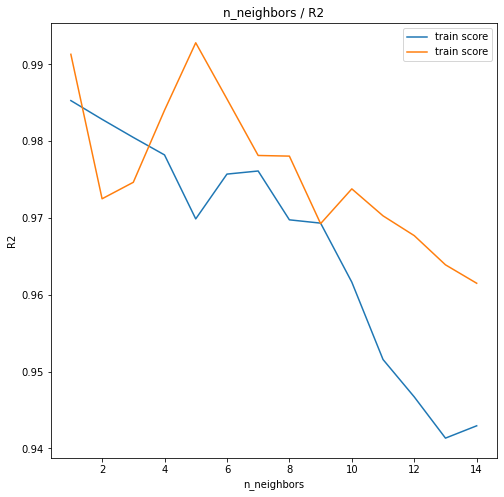

In [222]:
# KNN 회귀 모댈
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

train_k = []
test_k =[]
x = np.arange(1,15)


for i in x:
  kn = KNeighborsRegressor(n_neighbors=i)
  kn.fit(train_input,train_target)
  train_k.append(kn.score(train_input,train_target))
  test_k.append(kn.score(test_input,test_target))

train_k = np.array(train_k)
test_k = np.array(test_k)

plt.figure(figsize=(8,8))
plt.title("n_neighbors / R2")
plt.xlabel('n_neighbors')
plt.ylabel('R2')
plt.plot(x,train_k,label = 'train score')
plt.plot(x,test_k, label = 'train score')
plt.legend()
plt.show()

# 최적의 k - 5~7개 정도

[문제 2] kaggle등에서 관심 분야 데이터셋(csv파일)을 구해서 3가지 모델로 예측(회귀)을 하고 비교를 하시오

    2.1 단순선형회귀 

    2.2 다항선형회귀 

    2.3 다중선형회귀

    2.4 모델 비교


서울시 따릉이 자건거 이용 예측 AI 모델 - 데이터 분석

- 데이콘 데이터
- https://dacon.io/competitions/open/235576/overview/description
- 서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터
- train.csv / test.csv
  - id 고유 id
  - hour 시간
  - temperature 기온
  - precipitation 비가 오지 않았으면 0, 비가 오면 1
  - windspeed 풍속(평균)
  - humidity 습도
  - visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
  - ozone 오존
  - pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
  - pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
  - count 시간에 따른 따릉이 대여 수



    2. 데이터 분석 및 전처리 

In [223]:
# 라이브러리 임포트
import pandas as pd
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# 데이터 양상
print(train.info())

# 데이터 헤드
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [224]:
# 결측치 확인 및 처리
train.isnull().sum(), test.isnull().sum()

(id                          0
 hour                        0
 hour_bef_temperature        2
 hour_bef_precipitation      2
 hour_bef_windspeed          9
 hour_bef_humidity           2
 hour_bef_visibility         2
 hour_bef_ozone             76
 hour_bef_pm10              90
 hour_bef_pm2.5            117
 count                       0
 dtype: int64,
 id                         0
 hour                       0
 hour_bef_temperature       1
 hour_bef_precipitation     1
 hour_bef_windspeed         1
 hour_bef_humidity          1
 hour_bef_visibility        1
 hour_bef_ozone            35
 hour_bef_pm10             37
 hour_bef_pm2.5            36
 dtype: int64)

In [225]:
# 0으로 채우기
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# 결측치 확인
train.isnull().sum(), test.isnull().sum()

(id                        0
 hour                      0
 hour_bef_temperature      0
 hour_bef_precipitation    0
 hour_bef_windspeed        0
 hour_bef_humidity         0
 hour_bef_visibility       0
 hour_bef_ozone            0
 hour_bef_pm10             0
 hour_bef_pm2.5            0
 count                     0
 dtype: int64,
 id                        0
 hour                      0
 hour_bef_temperature      0
 hour_bef_precipitation    0
 hour_bef_windspeed        0
 hour_bef_humidity         0
 hour_bef_visibility       0
 hour_bef_ozone            0
 hour_bef_pm10             0
 hour_bef_pm2.5            0
 dtype: int64)

    2.1 단순선형회귀 모델 생성
1. 상관관계 분석
2. `count` 와 가장 높은 상관관계를 가지고 있는 컬럼을 x(요인)으로 하여 예측

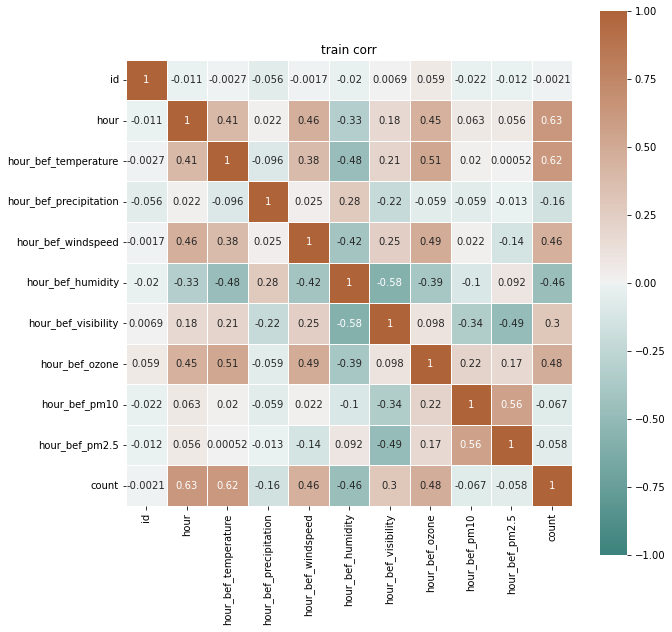

count                     1.000000
hour                      0.626047
hour_bef_temperature      0.619277
hour_bef_ozone            0.479579
hour_bef_windspeed        0.458547
hour_bef_visibility       0.301195
id                       -0.002131
hour_bef_pm2.5           -0.057918
hour_bef_pm10            -0.066773
hour_bef_precipitation   -0.163580
hour_bef_humidity        -0.464890
Name: count, dtype: float64

In [226]:
# 상관관계 
corr = train.corr()

#히트맵
import seaborn as sns
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(903, 30, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1,vmax=1, center=0, 
            square=True, linewidths=0.5, linecolor = "white") 
# corr 값 / annot 상관관계 수치화 / cmap 색 / vmin vmax 최소최대 / center 센터값
# square 정사각형 / cbar 컬러바 / fmt 소수점 자리 지정 / linewidths 선

plt.title("train corr")
plt.show()

# cout와 가장 높은 거 확인
corr_s = corr['count'].sort_values(ascending=False)
corr_s

훈련 데이터셋 결정계수 : 0.3931900495791293    테스트 데이터셋 결정계수 : 0.3882079257059261


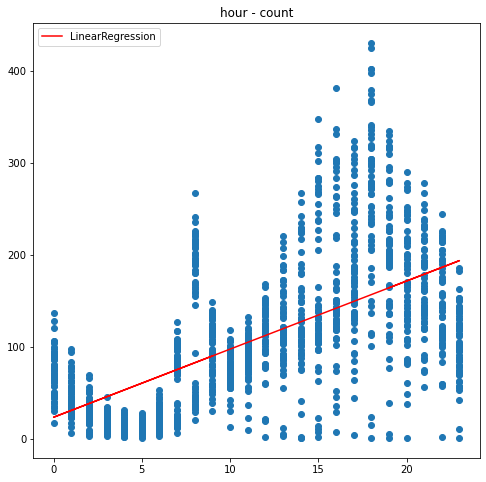

In [227]:
# 가장 높음 hour만 단순회귀로 사용
# 피처 타겟 설정 
input = train[['hour']].to_numpy()
target = train['count'].to_numpy()

# 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
  input, target, random_state=42
)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(f'훈련 데이터셋 결정계수 : {lr.score(train_input, train_target)}    테스트 데이터셋 결정계수 : {lr.score(test_input, test_target)}')

# 그래프
plt.figure(figsize=(8,8))
plt.title('hour - count')
plt.scatter(input, target)
plt.plot(train_input, lr.predict(train_input), color='red', label='LinearRegression')
plt.legend()


    2.2 다항선형회귀 
1. 차수를 늘려 적당한 차수를 찾아 모델 생성

훈련 데이터셋 결정계수 : 0.5717777223597924    테스트 데이터셋 결정계수 : 0.5659502032408195


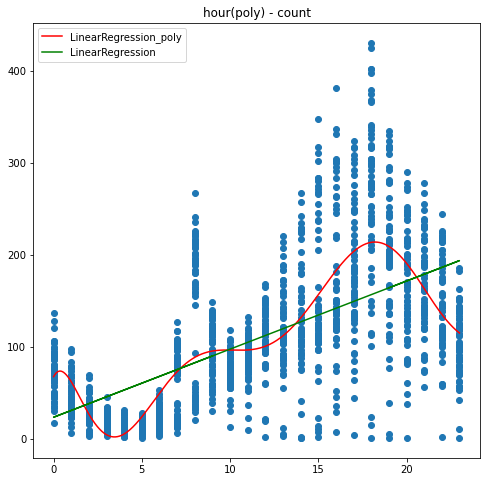

In [236]:
from sklearn.preprocessing import PolynomialFeatures
# 함수 생성
poly = PolynomialFeatures(degree = 8, include_bias=False)
# 학습하고 변환해주기
train_poly = poly.fit_transform(train_input)
test_poly = poly.fit_transform(test_input)

# 다시 학습
lr_p = LinearRegression()
lr_p.fit(train_poly, train_target)
print(f'훈련 데이터셋 결정계수 : {lr_p.score(train_poly, train_target)}    테스트 데이터셋 결정계수 : {lr_p.score(test_poly, test_target)}')
# 조금 올랐다

# 그래프
plt.figure(figsize=(8,8))
plt.title('hour(poly) - count')
plt.scatter(input, target)

point = np.linspace(0,23,1459).reshape(-1,1)
p_poly = poly.fit_transform(point)

plt.plot(point, lr_p.predict(p_poly), color='r', label='LinearRegression_poly')
plt.legend()

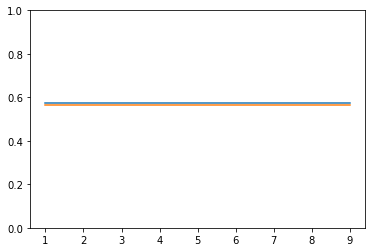

In [229]:
# 최적의 차수 찾기
degree_train = []
degree_test = []

for i in range(1,10):
  poly = PolynomialFeatures(degree = i, include_bias=False)
  lr_p = LinearRegression()
  lr_p.fit(train_poly, train_target)
  degree_train.append(lr_p.score(train_poly, train_target))
  degree_test.append(lr_p.score(test_poly, test_target))

degree_train = np.array(degree_train)
degree_test = np.array(degree_test)

plt.ylim(0,1)
plt.plot(range(1,10), degree_train)
plt.plot(range(1,10), degree_test)

# 으흠... 글러먹었군 데이터가 좋지 않나봅니다.. 8로 가겠습니다..

    2.3 다중선형회귀
1. `hour` 다음에 가장 높은 `hour_bef_temperature` 요인에 추가
2. 그래프는.. 3차원으로 그려야하는데 아직 거기까지 실력이 안됨

In [230]:
# 데이터 추가
train = train[['hour','hour_bef_temperature']]

# 데이터 분리
train_m_input, test_m_input, train_target, test_target = train_test_split(
  train, target, random_state=42
)

# 모델 학습
lr_m = LinearRegression()
lr_m.fit(train_m_input, train_target)
print(f'훈련 데이터셋 결정계수 : {lr_m.score(train_m_input, train_target)}    테스트 데이터셋 결정계수 : {lr_m.score(test_m_input, test_target)}')
# 바보다...하..

훈련 데이터셋 결정계수 : 0.542264792683808    테스트 데이터셋 결정계수 : 0.5772139663120128


    2.4 모델 비교

단순선형회귀
훈련 데이터셋 결정계수 : 0.3931900495791293    테스트 데이터셋 결정계수 : 0.3882079257059261

다항선형회귀
훈련 데이터셋 결정계수 : 0.5717777223597924    테스트 데이터셋 결정계수 : 0.5659502032408195

다중선형회귀
훈련 데이터셋 결정계수 : 0.542264792683808    테스트 데이터셋 결정계수 : 0.5772139663120128

단순 vs 다항


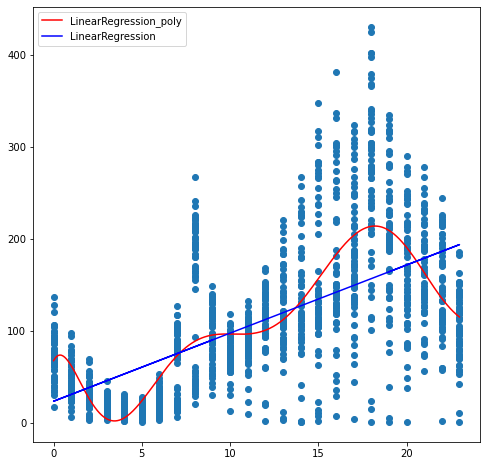

In [246]:
# 점수 비교
print("단순선형회귀")
print(f'훈련 데이터셋 결정계수 : {lr.score(train_input, train_target)}    테스트 데이터셋 결정계수 : {lr.score(test_input, test_target)}\n')

print("다항선형회귀")
print(f'훈련 데이터셋 결정계수 : {lr_p.score(train_poly, train_target)}    테스트 데이터셋 결정계수 : {lr_p.score(test_poly, test_target)}\n')

print("다중선형회귀")
print(f'훈련 데이터셋 결정계수 : {lr_m.score(train_m_input, train_target)}    테스트 데이터셋 결정계수 : {lr_m.score(test_m_input, test_target)}\n')


print("단순 vs 다항")

# 그래프
plt.figure(figsize=(8,8))
plt.scatter(input, target)

point = np.linspace(0,23,1459).reshape(-1,1)
p_poly = poly.fit_transform(point)

plt.plot(point, lr_p.predict(p_poly), color='r', label='LinearRegression_poly')
plt.plot(train_input, lr.predict(train_input), color='b', label='LinearRegression')
plt.legend()
plt.show()